Linear Regression

Y = w*x+b

Y-- Dependent Variable

X-- Independent Variable

w-- Weight

b-- Bias

Gradient Descent-- Optimization algorithm for minimizing the loss function

w = w-a*dw

b = b-a*db

Learning Rate-- A tuning parameter in an optimization algorithm that determines the step size at each iteration while moving towards a minimum of loss function







 

Work Flow Of Linear Regression Model 

Step 1: Set learning rate and no. of iterations; Initiate random weight and bias

Step 2: Build Linear Regression Equation(y = w*x+b)

Step 3: Find the "y pred" value for a given x value for the corresponding weight and bias

Step 4: Check the loss function for these parameter values. (Difference between the y pres & true y)

Step 5: Update the parameter descent using Gradient Descent

Step 6: Step 3,4,5 are repeated till we get minimum loss function 

Finally we will get the best model as it has the minimum loss function


In [36]:
#Importing numpy library
import numpy as np

Linear Regression Model

In [86]:
class Linear_Regression():
    #initializing the parameters(learning rate and no. of iterations)
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    def fit(self,X,y):
        #number of training examples and number of features
        self.m,self.n = X.shape
        #initializing the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        #implementing the gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()
            
    
    def update_weights(self):
        y_Prediction = self.predict(self.X)
        #Calculating Gradients
        dw = -(2*(self.X.T).dot(self.y-y_Prediction))/self.m
        db = -2*(np.sum(self.y-y_Prediction))/self.m
        #updating the weights
        self.w = self.w-self.learning_rate*dw
        self.b = self.b-self.learning_rate*db
        
    def predict(self,X):
        return X.dot(self.w) + self.b
    
    
       
        

Using Linear Regression Model Making Prediction

In [87]:
#Importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [88]:
#Data Preprocessing
data = pd.read_csv(r"C:\Users\princ\OneDrive\Documents\Chapter 1\Python\Machine Learning\ML Data\salary_data.csv")
#Printing 1st five rows of the dataset
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [89]:
data.shape

(30, 2)

In [90]:
#Checking for Missing values
data.isnull().sum()



YearsExperience    0
Salary             0
dtype: int64

In [91]:
#Seprating the features and the Target
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [99]:
#Splittting the dataset into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 5)

Training the Linear Regression Model

In [124]:
Model = Linear_Regression(learning_rate = 0.01 , no_of_iterations = 100)
Model.fit(X_train,y_train)

In [125]:
#Printing the parameters values
print('Weight = ',Model.w[0])
print('Bias = ',Model.b)

Weight =  11801.729734478877
Bias =  11328.724686077445


In [126]:
#Predicting the test data salary values
test_data_pred = Model.predict(X_test)

In [127]:
print(test_data_pred)

[ 58535.64362399 135246.88689811 108102.9085088  117544.29229639
  80958.9301195   57355.47065055  29031.3192878   59715.81659744
 123445.15716363  95121.00580088]


Visualizing the Predicted and the Actual Values

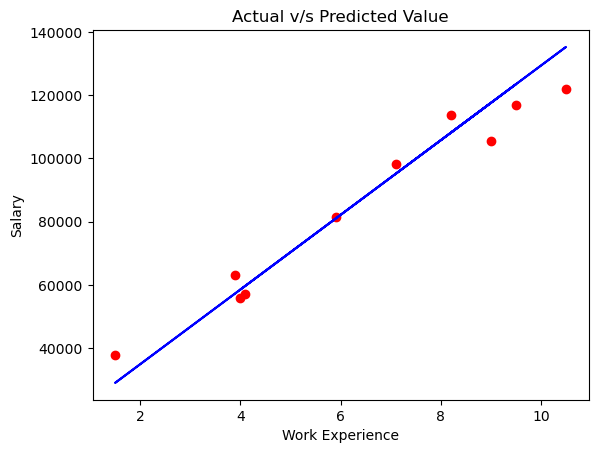

In [128]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,test_data_pred,color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Actual v/s Predicted Value')


plt.show()